<a href="https://colab.research.google.com/github/MaxVieiraSantiago/Machine-Learning-Algorithms/blob/master/Linear%20Regression/Video_Game_Sales_Prediction_Model_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Regressão Linear**

A análise de vendas de videogame é uma declaração de problema popular no Kaggle. Você pode trabalhar nesse problema para analisar as vendas de mais de 16.500 jogos ou também treinar um modelo de aprendizado de máquina para prever vendas de videogames. Então, se você quer aprender como treinar um modelo de previsão de vendas de videogames, este artigo é para você. Neste artigo, orientarei você em uma tarefa de aprendizado de máquina sobre como treinar um modelo de previsão de vendas de videogame usando Python.

### **Video Game Sales Prediction Model using Python**

O conjunto de dados que estou usando para esta tarefa contém uma lista de videogames e suas vendas. Vamos começar esta tarefa importando as bibliotecas Python e o conjunto de dados necessários:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file = 'vgsales.csv'
dados = pd.read_csv( file )
print( dados.head() )

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


Agora vamos ver se este conjunto de dados contém valores nulos:

In [3]:
dados.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Agora vou criar um novo conjunto de dados removendo os valores nulos:

In [4]:
dados = dados.dropna()
dados.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Antes de treinarmos o modelo, vamos dar uma olhada nas 10 categorias de jogos mais vendidos:

In [10]:
dados['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

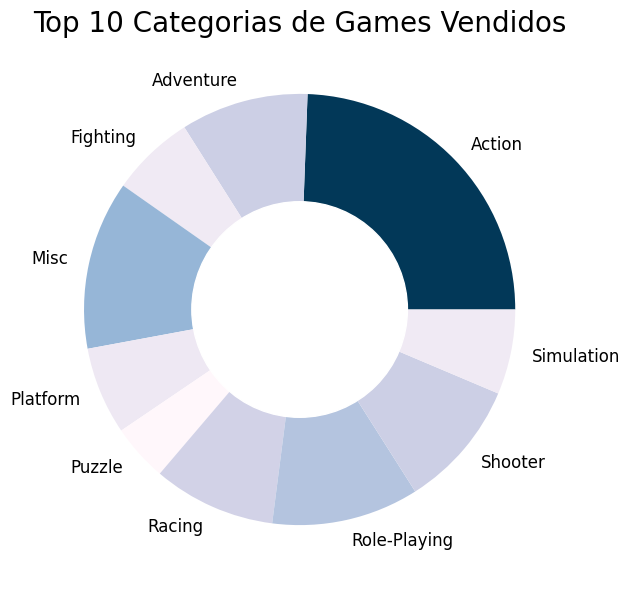

In [18]:
import matplotlib as mpl
game = dados.groupby("Genre")['Global_Sales'].count().head(10)
custom_colors = mpl.colors.Normalize(vmin=min(game), vmax=max(game))
colours = [mpl.cm.PuBu(custom_colors(i)) for i in game]

plt.figure(figsize=(7,7))
plt.pie(game, labels=game.index, colors=colours)
central_circle = plt.Circle((0,0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title('Top 10 Categorias de Games Vendidos', fontsize=20)
plt.show()



Agora vamos dar uma olhada na correlação entre os recursos deste conjunto de dados:

<ipython-input-21-0eee2092cce1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(dados.corr())
<ipython-input-21-0eee2092cce1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dados.corr(), cmap='winter_r')


                  Rank      Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Rank          1.000000  0.178027 -0.400315 -0.379137 -0.269323    -0.332735   
Year          0.178027  1.000000 -0.091285  0.006108 -0.169387     0.041128   
NA_Sales     -0.400315 -0.091285  1.000000  0.768923  0.451283     0.634518   
EU_Sales     -0.379137  0.006108  0.768923  1.000000  0.436379     0.726256   
JP_Sales     -0.269323 -0.169387  0.451283  0.436379  1.000000     0.290559   
Other_Sales  -0.332735  0.041128  0.634518  0.726256  0.290559     1.000000   
Global_Sales -0.426975 -0.074647  0.941269  0.903264  0.612774     0.747964   

              Global_Sales  
Rank             -0.426975  
Year             -0.074647  
NA_Sales          0.941269  
EU_Sales          0.903264  
JP_Sales          0.612774  
Other_Sales       0.747964  
Global_Sales      1.000000  


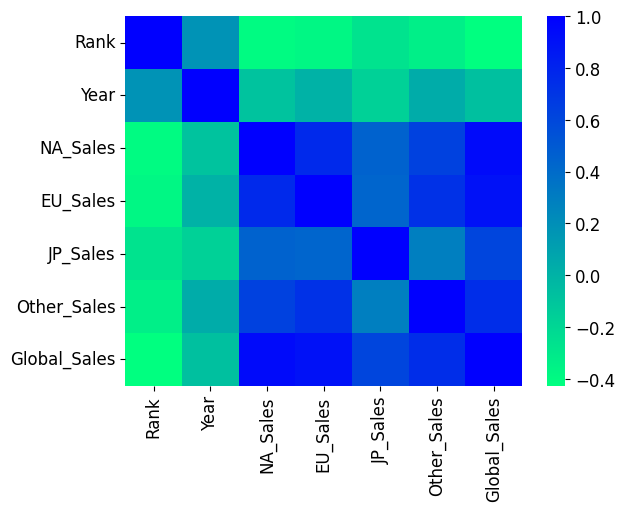

In [21]:
print(dados.corr())
sns.heatmap(dados.corr(), cmap='winter_r')
plt.show()

### **Training Video Game Sales Prediction Model**

Agora vamos ver como treinar um modelo de aprendizado de máquina para prever vendas de videogames com Python. Prepararei os dados armazenando os recursos necessários para treinar este modelo na variável x e armazenando a coluna de destino na variável y:

In [25]:
X = dados[ [ 'Rank', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales' ]].values
y = dados['Global_Sales' ].values

Agora vamos dividir os dados e usar o algoritmo de regressão linear para treinar este modelo:

In [26]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=0)

In [27]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(Xtrain, ytrain)

ypred = modelo.predict(Xtest)

Vamos ver algumas métricas do modelo:

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(ytest, ypred)
rmse = np.sqrt( mean_squared_error(ytest, ypred ))

print('Mean Absolute Error = {:3.2f}'.format(mae))
print('Root Mean Squared Error = {:3.2f}'.format(rmse))

Mean Absolute Error = 0.00
Root Mean Squared Error = 0.01


### **Summary**

É assim que podemos treinar um modelo de aprendizado de máquina para prever vendas de videogames. Esta é uma declaração de problema Kaggle popular que você pode usar para melhorar suas habilidades no trabalho com dados e treinamento no modelo de aprendizado de máquina. Espero que você tenha gostado deste artigo sobre como treinar um modelo de previsão de vendas de videogame usando Python.